## Aim of the analysis

The goal of the project is to determine which features of a movie affect gross earnings. The hypothesis is several features such as production company, director, movie star etc. are important factors which influence movie earnings.

In [61]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read the data
df = pd.read_csv("dataset_movies.csv")

# Take a look at the imported data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [62]:
# Check for missing data in the dataframe

print('Percentage of values missing in each column:')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

Percentage of values missing in each column:
budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [63]:
# Check data types for columns 
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [64]:
# Change data type for 'budget' and 'gross' to integer to remove the decimal
df['budget'] = df['budget'].astype(int)

df['gross'] = df['gross'].astype(int)

# Check results
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [65]:
# Some values for year in 'released' do not match with those in 'year', for example
df.loc[5,['released', 'year']]

released    1987-02-06
year              1986
Name: 5, dtype: object

In [66]:
# Create column for correct year of release
df['year_correct'] = df['released'].astype(str).str[:4]

# Check results
df.loc[5,['released', 'year_correct', 'year']]

released        1987-02-06
year_correct          1987
year                  1986
Name: 5, dtype: object

In [67]:
pd.set_option('display.max_rows', None)

In [92]:
# Check highest grossing films
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


## Correlation analysis

We will checking for correlation between 'gross' revenue and some of the attributes to see whether there is any sort of relationship that can be used to predict how much a movie will gross. 

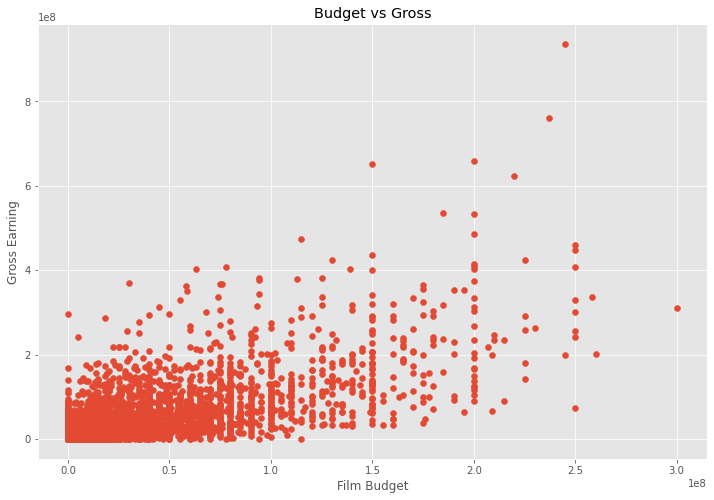

In [70]:
# Scatter plot gross vs budget
plt.scatter(x=df['budget'], y=df['gross'])

plt.title("Budget vs Gross")
plt.xlabel("Film Budget")
plt.ylabel("Gross Earning")

plt.show();

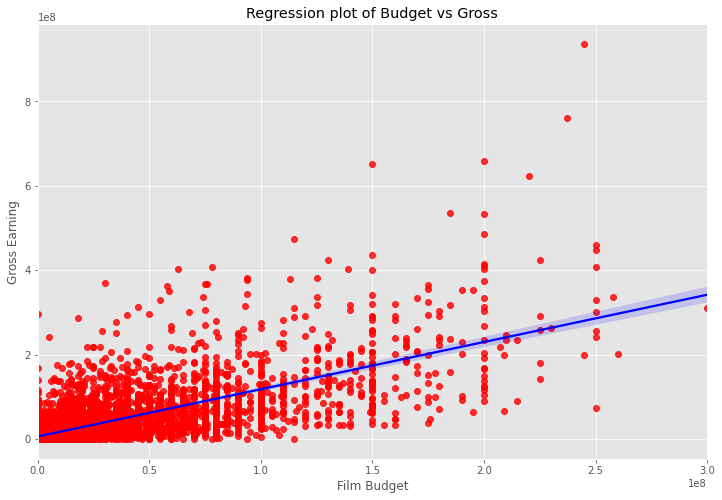

In [76]:
# Plot budget vs gross using seaborn

sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title('Regression plot of Budget vs Gross')
plt.xlabel("Film Budget")
plt.ylabel("Gross Earning")

plt.show();

In [77]:
# Calculate correlation values to measure strenghth of relationships
df.corr(method='pearson') # pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


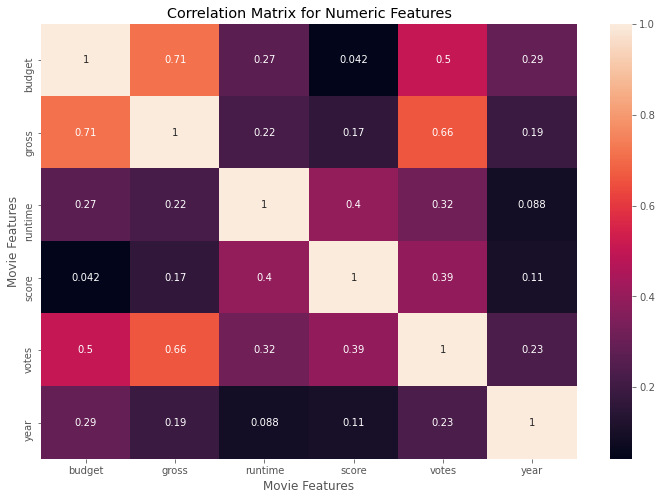

In [80]:
# Create a heatmap to make it visually easier to see differences in values
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show();

In [91]:
# Create numerical representations of string fields so we can create a matrix for all features
df_numerised = df

for col_name in df_numerised.columns:
    if (df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


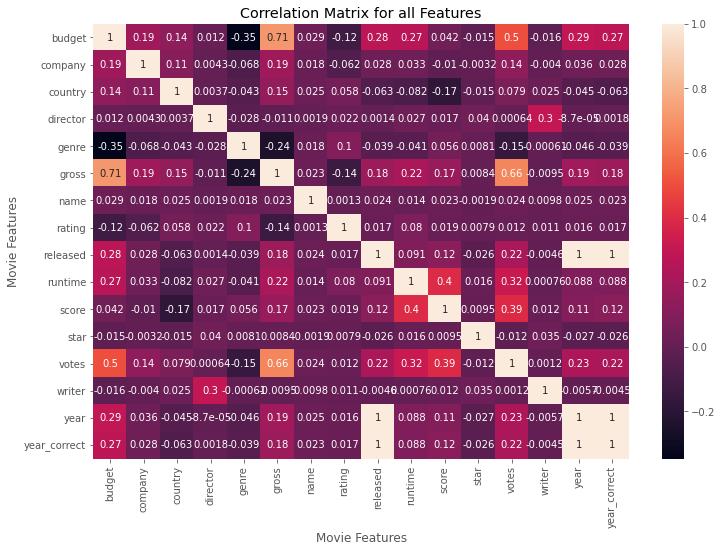

In [85]:
correlation_matrix = df_numerised.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for all Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show();

In [86]:
# Lets organise it to make it even easier to compare

correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.028712
              rating         -0.119660
              released        0.276635
              runtime         0.268226
              score           0.042145
              star           -0.015062
              votes           0.503924
              writer         -0.015611
              year            0.291009
              year_correct    0.274820
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004320
              genre          -0.068330
              gross           0.187220
              name            0.018098
              rating         -0.062250
              released        0.027898
              runtime    

In [87]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
country       score          -0.174414
votes         genre          -0.150519
genre         votes          -0.150519
rating        gross          -0.135538
gross         rating         -0.135538
budget        rating         -0.119660
rating        budget         -0.119660
country       runtime        -0.081796
runtime       country        -0.081796
genre         company        -0.068330
company       genre          -0.068330
country       year_correct   -0.062707
year_correct  country        -0.062707
country       released       -0.062609
released      country        -0.062609
rating        company        -0.062250
company       rating         -0.062250
year          genre          -0.046259
genre         year           -0.046259
country       year           -0.045204
year          country    

In [90]:
# Trim the list down to the ones with the highest correlation values

high_corr =  sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year_correct  year            0.996229
year          year_correct    0.996229
year_correct  released        0.999389
released      year_correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

## Results

Budget and votes have the highest correlation to gross earnings and seem to play a bigger role in whether a movie earns a high revenues. Other features such as studio, star, director etc. are not significant. 